Data set is taken from here: https://dataverse.harvard.edu/dataset.xhtml?persistentId=hdl:1902.1/12379

In [37]:
# Import all the libraries used in the notebook
import pandas as pd
from matplotlib import pyplot as plt
import requests
import json
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
from IPython.core.display import HTML 
from sklearn.cluster import KMeans, k_means
from sklearn.metrics import silhouette_score
from sklearn.datasets.samples_generator import make_blobs
import numpy as np
import ipywidgets as widgets
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
from sklearn.preprocessing import scale
%matplotlib inline
import hdbscan
from sklearn import metrics
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from pprint import pprint

In [38]:
# read tab file of voting records (1948 - 2017)
df_votes = pd.read_csv('~/Documents/Capstone-UN/UNVotes1-72.tab',sep='\t')

In [39]:
len(df_votes.rcid.unique())

5598

# Initial EDA on Raw UNGA dataset

In [40]:
df_votes

,rcid,ccode,session,member,vote,Country,Countryname,year
0,3.0,2,1.0,1.0,1,USA,United States of America,1946
1,3.0,20,1.0,1.0,3,CAN,Canada,1946
2,3.0,31,1.0,NaN,9,BHS,Bahamas,1946
3,3.0,40,1.0,1.0,1,CUB,Cuba,1946
4,3.0,41,1.0,1.0,1,HTI,Haiti,1946
5,3.0,42,1.0,1.0,1,DOM,Dominican Republic,1946
6,3.0,51,1.0,NaN,9,JAM,Jamaica,1946
7,3.0,52,1.0,NaN,9,TTO,Trinidad and Tobago,1946
8,3.0,53,1.0,NaN,9,BRB,Barbados,1946
9,3.0,54,1.0,NaN,9,DMA,Dominica,1946


^^ This is what the dataset looks like. {rcid: resolution ID, ccode: Country Code,
session: Count of Assemblies from 1946, member: Country member code, vote: decision on resolution
.....rest is obvious}
vote – Vote choice
1 – Yes
2 – Abstain
3 – No
8 – Absent
9 – Not a member

In [41]:
# Very large dataset
df_votes.shape

(1099156, 8)

In [42]:
df_votes.dtypes
# All seem to be in usable format

rcid           float64
ccode            int64
session        float64
member         float64
vote             int64
Country         object
Countryname     object
year             int64
dtype: object

In [43]:
df_votes.info()
# Indicates there are a huge numbermissing values in the member column.  
# This is because of time prior to a state becoming a member
print("Number of missing values in 'member':" +str(1098964-846858))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1099156 entries, 0 to 1099155
Data columns (total 8 columns):
rcid           1099156 non-null float64
ccode          1099156 non-null int64
session        1098964 non-null float64
member         846858 non-null float64
vote           1099156 non-null int64
Country        1091797 non-null object
Countryname    1098987 non-null object
year           1099156 non-null int64
dtypes: float64(3), int64(3), object(2)
memory usage: 67.1+ MB
Number of missing values in 'member':252106


In [44]:
df_votes.describe(include=['object'])
# This suggests to me countries may have been renamed and kept the same country code.
# Requires further inquiry

,Country,Countryname
count,1091797,1098987
unique,198,200
top,JPN,Uruguay
freq,5598,5598


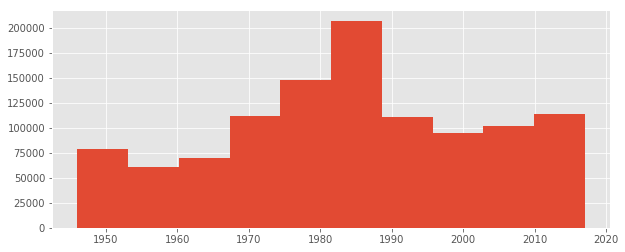

In [45]:
df_votes.year.hist(figsize=(10,4));
# looks like voting peaked in the 60's, and then flatlines, with an uptick over the last 7 years

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a20a49668>,
      dtype=object)

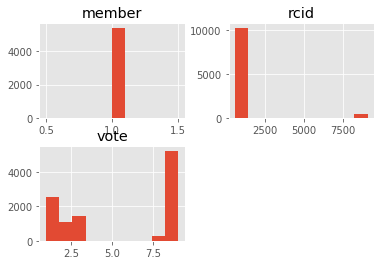

In [46]:
df_votes[df_votes.year == 1960][['vote','Countryname','rcid', 'member']].hist()
# This appears to show that: 1. There are more non-member votes than member votes in 1960
# resolution 'present' most likely.  There are a low number 8's for 'absent'.  These should
# be dropped, as an absence is usually due to a structural problem such as a civil war or
# financial crisis. 
# 3's show there are a large number of abstaining votes. 

In [47]:
print(df_votes[df_votes.year == 1960][['vote','Countryname','rcid', 'member']].head(10))
# it appears that countries are labeled as 'Nan' before the country joined the UN. 
# I can convert these values to represent a binary, 1 = member, 0 = non_member


        vote               Countryname   rcid  member
129626     1  United States of America  627.0     1.0
129627     1                    Canada  627.0     1.0
129628     9                   Bahamas  627.0     NaN
129629     3                      Cuba  627.0     1.0
129630     8                     Haiti  627.0     1.0
129631     2        Dominican Republic  627.0     1.0
129632     9                   Jamaica  627.0     NaN
129633     9       Trinidad and Tobago  627.0     NaN
129634     9                  Barbados  627.0     NaN
129635     9                  Dominica  627.0     NaN


In [48]:
# creating a df for 1960 alone
df_votes_1960 = df_votes[df_votes.year == 1960]

In [49]:
# I'm interested in just looking at the data for a single year since this will be my unit of analysis
df_votes_1960.head()

,rcid,ccode,session,member,vote,Country,Countryname,year
129626,627.0,2,15.0,1.0,1,USA,United States of America,1960
129627,627.0,20,15.0,1.0,1,CAN,Canada,1960
129628,627.0,31,15.0,NaN,9,BHS,Bahamas,1960
129629,627.0,40,15.0,1.0,3,CUB,Cuba,1960
129630,627.0,41,15.0,1.0,8,HTI,Haiti,1960


In [50]:
# Now I want to group by vote type. Just to see
df_votes_1960.vote.value_counts().sort_index()
#It looks like '9' for non-members is the dominant category. 

1    2577
2    1084
3    1461
8     276
9    5240
Name: vote, dtype: int64

In [51]:
# Now I want to see which countries aren't members
# Appears to show that about 98 nations represented in the data set were not members
# at the time of voting.  Given the list of countries this make intuitive sense given
# that most are obviously not yet countries in 1960 or are developing nations, which
# in 1960 were not well represented in the UN General Assembly

df_votes[(df_votes.year == 1960) & (df_votes.vote == 9)].groupby('Countryname').sum().head()

,rcid,ccode,session,member,vote,year
Countryname,,,,,,
Algeria,52011.0,33210,810.0,0.0,486,105840
Andorra,52011.0,12528,810.0,0.0,486,105840
Angola,52011.0,29160,810.0,0.0,486,105840
Antigua and Barbuda,52011.0,3132,810.0,0.0,486,105840
Armenia,52011.0,20034,810.0,0.0,486,105840


In [52]:
# After confirming the meaning of non-member 'votes' I'm going to drop all of the countries
# in 1960 that were not members from the df_votes_1960 dataframe. I believe I can drop all
# non-member records from the entire df, but I will wait for the moment:

df_votes_1960_members = df_votes_1960[df_votes_1960.member == 1]

In [53]:
df_votes_1960_members.vote.value_counts().sort_index()
# I wonder where the 2 "9" value "non-member" votes are coming from.  Next cell

1    2577
2    1084
3    1461
8     276
9       2
Name: vote, dtype: int64

In [54]:
df_votes_1960_members[df_votes_1960_members.vote == 9]
# Nigeria is the only country that has a non-member vote as a member
# This is a coding error.  They became a member, but at the time of voting
# They were not yet a member.  This goes to the pt that dropping recodes based
# on recorded membership my create minor errors in this data set.  'Vote' is a more
# precise measure for indicating whether a country is a member at the time of the resolution


,rcid,ccode,session,member,vote,Country,Countryname,year
149821,9040.0,475,15.0,1.0,9,NGA,Nigeria,1960
150018,9041.0,475,15.0,1.0,9,NGA,Nigeria,1960


# Data Cleaning and Feature Engineering

In [55]:
# filter df for only voting members
df_votes = df_votes[df_votes.member == 1]

In [56]:
# Confirming that member column only reads "1" for voting members
df_votes.head(4)

,rcid,ccode,session,member,vote,Country,Countryname,year
0,3.0,2,1.0,1.0,1,USA,United States of America,1946
1,3.0,20,1.0,1.0,3,CAN,Canada,1946
3,3.0,40,1.0,1.0,1,CUB,Cuba,1946
4,3.0,41,1.0,1.0,1,HTI,Haiti,1946


In [57]:
# Dropping country and countryname. Using ccode as country key
df_votes_year = df_votes.drop(['Country', 'Countryname'], axis=1) 

In [58]:
# Set a DF to only yes and no votes (0 nd 3)
df_votes_year_binary = df_votes_year[(df_votes_year.vote <= 1) | (df_votes_year.vote == 3)]
df_votes_year_binary.head(2)

,rcid,ccode,session,member,vote,year
0,3.0,2,1.0,1.0,1,1946
1,3.0,20,1.0,1.0,3,1946


In [59]:
# Turn 1 = yes and 3 = no into 0 = no and 1 = yes
df_votes_year_binary.vote = df_votes_year_binary.vote.replace(to_replace=3, value=0, inplace=False, limit=None, regex=False, method='pad', axis=None)
df_votes_year_binary.head(2)

/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


,rcid,ccode,session,member,vote,year
0,3.0,2,1.0,1.0,1,1946
1,3.0,20,1.0,1.0,0,1946


In [60]:
# drop session column and set equal to new df
df_year_features = df_votes_year_binary.drop(['session'], axis=1)

In [61]:
df_year_features.head(4)

,rcid,ccode,member,vote,year
0,3.0,2,1.0,1,1946
1,3.0,20,1.0,0,1946
3,3.0,40,1.0,1,1946
4,3.0,41,1.0,1,1946


In [62]:
# Counting the votes per year
c = pd.DataFrame(df_year_features.groupby('year').count())
c.reset_index(inplace=True)
c = c.drop(['member','v_res','vote', 'ccode'], axis=1)
c['votes'] = c.rcid
c = c.drop(['rcid'], axis=1)
c = c.sort_values('votes',ascending=False)

c

ValueError: labels ['v_res'] not contained in axis

In [63]:
# Vote multiplied by res to create a new v_res column that gives the resolution number if 
# There was a yes vote.  This will be used later to create dummy columns
df_year_features['v_res'] = df_year_features['rcid']*df_year_features['vote']

In [64]:
#I'm creating a df that has one record for every UN nation so that it can be merged with our output later
df_name_index = pd.DataFrame(df_votes.groupby(['ccode', 'Countryname','Country'])['Countryname'].count())
df_name_index['count'] = df_name_index.Countryname
df_name_index = df_name_index.drop([ 'Countryname','count'], axis=1)
df_name_index.reset_index(inplace=True)
df_name_index.head(2)

,ccode,Countryname,Country
0,2,United States of America,USA
1,20,Canada,CAN


# Create function to create DFs for multiple years

In [65]:
# This function takes a year as an argument and returns a df with 1s and 0s indicating whether each member country
# voted on each resolution proposed in a that year
def create_year_df(year):
    df_output_year = df_year_features[df_year_features['year'] == year]
    df_output_year = pd.concat([df_output_year,pd.get_dummies(df_output_year.v_res, prefix='res_')], axis = 1)
    #print(df_output_year)
    try:
        df_output_year = df_output_year.drop(['year','rcid','member','v_res','vote', 'res__0.0'], axis=1)
    except:
        pass 
    df_output_year = df_output_year.set_index('ccode')
    df_output_year = df_output_year.groupby('ccode').sum()
    
    return df_output_year
create_year_df(1948);

In [66]:
# creating dictionary of years and corresponding dataframe names passing aech value from the 
# groups list into the for loop at the bottom of the cell
frames = {}
groups = [1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959,  
          1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974,
          1975, 1976, 1977, 1978, 1978, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1986, 1988, 1989,
          1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
          2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]
for grp in groups: 
    frames[grp] = create_year_df(grp)  

In [67]:
# Making sure my keys correspond with the groups list created in the last cell
frames.keys()

dict_keys([1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017])

In [68]:
# Confirming that the dataframe looks proper
frames.get(1946).head(4)

,res__3.0,res__4.0,res__5.0,res__6.0,res__7.0,res__8.0,res__9.0,res__10.0,res__11.0,res__12.0,...,res__36.0,res__37.0,res__38.0,res__39.0,res__40.0,res__41.0,res__42.0,res__43.0,res__44.0,res__45.0
ccode,,,,,,,,,,,,,,,,,,,,,
2,1,0,0,0,0,0,1,1,1,1,...,0,0,1,0,1,0,0,1,1,1
20,0,0,0,0,0,1,1,1,1,1,...,1,1,1,1,1,0,0,1,1,0
40,1,0,1,1,1,1,1,1,1,1,...,0,1,1,1,1,0,0,1,1,0
41,1,0,0,0,1,0,1,1,0,0,...,0,0,0,0,0,1,1,1,0,0


In [69]:
# read in descr file
df_descriptions = pd.read_csv('~/documents/UN-Capstone/Dscription.csv',skipinitialspace=True)

In [70]:
# Looking at contents of the descr file
df_descriptions.head(2)

,Unnamed: 0,session,rcid,abstain,yes,no,importantvote,date,unres,amend,para,short,descr,me,nu,di,hr,co,ec,year
0,1,1,3,4,29,18,0,1946-01-01,R/1/66,1.0,0.0,"AMENDMENTS, RULES OF PROCEDURE",TO ADOPT A CUBAN AMENDMENT TO THE UK PROPOSAL ...,0,0,0,0,0,0,1946
1,2,1,4,8,9,34,0,1946-01-02,R/1/79,0.0,0.0,SECURITY COUNCIL ELECTIONS,TO ADOPT A USSR PROPOSAL ADJOURNING DEBATE ON ...,0,0,0,0,0,0,1946


In [71]:
# grouping resolutions by year
b = df_descriptions.groupby('year')['year'].count()

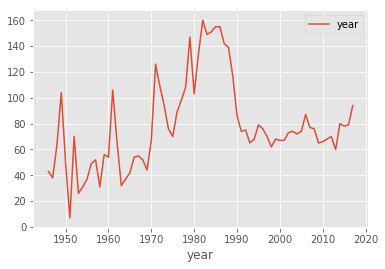

In [72]:
#Visualizing how many resolutions per year

b.plot(x=None, y='Count', kind='line', ax=None, subplots=False, sharex=None, 
      sharey=False, layout=None, figsize=None, use_index=True, title=None, grid=None, 
      legend=True, style=None, logx=False, logy=False, loglog=False, xticks=None, yticks=None, 
      xlim=None, ylim=None, rot=None, fontsize=None, 
      colormap=None, table=False, yerr=None, xerr=None, secondary_y=False, sort_columns=False)

In [73]:
df_votes.rcid.dtypes

dtype('float64')

## Output function

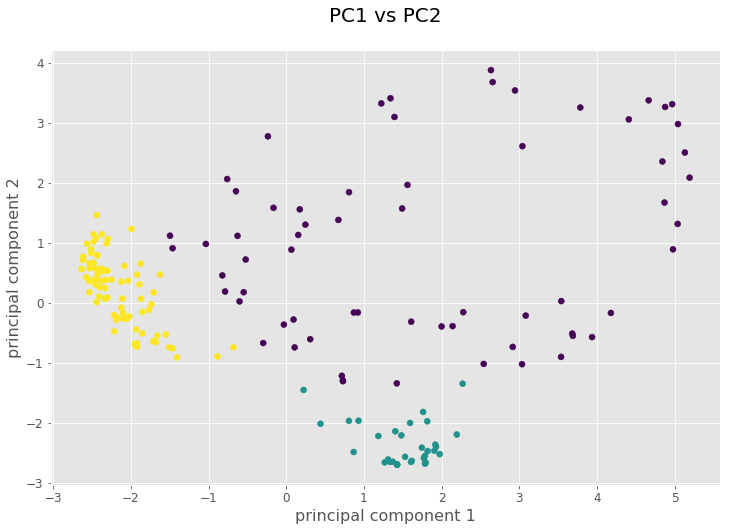

None
Estimated number of clusters: 2
Silhouette Coefficient: 0.212238


 Cluster 0: 34 
 ['Canada', 'Ireland', 'Netherlands', 'Luxembourg', 'Spain', 'Andorra', 'Portugal', 'Germany', 'Poland', 'Austria', 'Hungary', 'Czech Republic', 'Slovakia', 'Italy', 'Malta', 'Albania', 'The former Yugoslav Republic of Macedonia', 'Croatia', 'Slovenia', 'Bulgaria', 'Republic of Moldova', 'Romania', 'Estonia', 'Lithuania', 'Armenia', 'Finland', 'Sweden', 'Norway', 'Denmark', 'Iceland', 'Turkey', 'Kazakhstan', 'Japan', 'New Zealand']


 Cluster 1: 78 
 ['Cuba', 'Haiti', 'Jamaica', 'Trinidad and Tobago', 'Barbados', 'Mexico', 'Belize', 'Honduras', 'Panama', 'Colombia', 'Venezuela, Bolivarian Republic of', 'Guyana', 'Suriname', 'Ecuador', 'Peru', 'Brazil', 'Bolivia (Plurinational State of)', 'Chile', 'Uruguay', 'Cyprus', 'Cabo Verde', 'Mali', 'Senegal', 'Benin', 'Mauritania', 'Niger', "Côte D'Ivoire", 'Guinea', 'Burkina Faso', 'Ghana', 'Togo', 'Cameroon', 'Gabon', 'Chad', 'Uganda', 'Kenya', 'Djibouti', 

In [74]:
# This function forms the basis of the project's finished product and contrains code for prosessing the 
# UN vote DFs and; running through HDBSCAN to create lusters, printing the number of clusters, printing
# a silhouette score, printing a list of countries in each cluster, running the df through PCA analysis, 
# outputting a visualization of clusters based on principle components 1 and 2, and listing the resultions
# which caused the groupings (top 5 contriubuting the most to vaiance)

def output_all(year):
    #HDBSCAN:
    hdbscn = hdbscan.HDBSCAN(min_cluster_size = 15, min_samples = 5, 
               gen_min_span_tree = True)
    hdbscn.fit(frames.get(year))
    hdbscn_labels = hdbscn.labels_
    hdbscn_n_clusters_ = len(set(hdbscn_labels)) - (1 if -1 in hdbscn_labels else 0)
    
    df_output_year = create_year_df(year);
    df_output_year['cluster'] = hdbscn.labels_
    df_output_year.reset_index(inplace=True)
    df_output_year = pd.merge(df_output_year, df_name_index, on='ccode')
    
    #Create cluster lists
    cluster0_list = df_output_year[df_output_year.cluster == 0]['Countryname'].tolist()
    cluster1_list = df_output_year[df_output_year.cluster == 1]['Countryname'].tolist()
    cluster2_list = df_output_year[df_output_year.cluster == 2]['Countryname'].tolist()
    cluster_Outlier_list = df_output_year[df_output_year.cluster == -1]['Countryname'].tolist()

    #PCA:
    df_PCA = df_output_year.drop(['Countryname','Country'], axis=1)
    df_features = df_PCA
    X = df_PCA
    X = X.set_index('ccode')
    pca = PCA()
    pca = pca.fit(X)
    Z = pca.transform(X)
    features_pca = ['PC'+str(i+1) for i in range(pca.n_components_)]
    
    Z = pd.DataFrame(Z, columns=features_pca)
    X.reset_index(inplace=True)
    X = X[['ccode','cluster']]
    
    X = X.join(Z, lsuffix='_caller', rsuffix='_other')
    df_PCA = pd.merge(X, df_PCA, on='ccode')
    df_PCA = df_PCA[['ccode','cluster_x',"PC1","PC2"]] 
    
    # Rolling Out PC1 components:
    PCA_abs = abs((pca.components_))[0]
    df_features = df_features.set_index(['ccode','cluster'])
    t = zip(df_features.columns, PCA_abs)
    result_list = list(t)
    df_componenets = pd.DataFrame(result_list)
    df_componenets.columns = ['rcid', 'score']
    df_componenets = df_componenets.sort_values('score',ascending=False)
    df_componenets['rcid'] = df_componenets['rcid'].map(lambda x: x.lstrip('res__'))
    df_componenets['rcid'] = df_componenets['rcid'].astype(float)
  
    df_componenets = pd.merge(df_componenets, df_descriptions, on='rcid')
    df_pca_desc = df_componenets.descr
    df_componenets = df_componenets.drop(['abstain','session','date',
                                          'importantvote','unres','amend',
                                          'para', 'year','Unnamed: 0','descr','me', 'nu','di', 'hr', 'co','ec',], axis=1) #,'short'
    
    pd.set_option('display.max_colwidth',110)
    
    #Plot PCA
    fig = plt.figure(figsize=(12,8))
    ax = fig.gca()
    ax.scatter(Z.iloc[:,0], Z.iloc[:,1],
                       c=df_PCA.cluster_x)
    ax.set_xlabel('principal component 1', fontsize=16)
    ax.set_ylabel('principal component 2', fontsize=16)
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(12) 
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(12) 
 
    pd.set_option('display.max_colwidth', -1)   
    ax.set_title('PC1 vs PC2\n', fontsize=20)
    print(plt.show())
    
    # print HDBSCAN RESULTS:

    print('Estimated number of clusters: %d' % hdbscn_n_clusters_)
    # print('Homogeneity: %0.6f' % metrics.homogeneity_score(frames.get(year), hdbscn_labels))
    # print('Completeness: %0.6f' % metrics.completeness_score(y, hdbscn_labels))
    print('Silhouette Coefficient: %0.6f' % metrics.silhouette_score(frames.get(year), hdbscn_labels))
    
    print ("\n\n","Cluster 0:",len(cluster0_list),"\n",cluster0_list)
    print ("\n\n","Cluster 1:",len(cluster1_list),"\n",cluster1_list)
    if len(cluster2_list) > 0:
        print ("\n\n","Cluster 2:",len(cluster2_list),"\n",cluster2_list)
    else: ""
    
    print ("\n\n","Outliers:",len(cluster_Outlier_list),"\n",cluster_Outlier_list)
    
    print('\n',df_componenets.head(10))
    #return df_pca_desc.head(10)

    
output_all(1995)  

In [75]:
# When looking at the above output I was able to do this: I noticed that in 1960 a majority of the resolutions
# having the greatest weighting from PCA analysis related to resolution related to the Repulic of the Congo.
# I can see that the clusters there appears to be a a split along traditional cold war lines.  If I googel Congo
# 1960: https://en.wikipedia.org/wiki/Congo_Crisis#United_Nations_escalation_and_the_end_of_the_Katangese_secession
# "Congo Crisis" comes up on the top.  The page says that there "August 1960, Central Intelligence Agency (CIA) 
# agents in the region reported to their agency that "Congo [is] experiencing [a] classic communist ... takeover" 
# and warned that the Congo might follow the same path as Cuba.". So, not perfect, but the results seem useful.

In [77]:
interact(output_all, year=widgets.IntSlider(min=1946,max=2017,step=1))

interactive(children=(IntSlider(value=1946, description='year', max=2017, min=1946), Output()), _dom_classes=('widget-interact',))

<function __main__.output_all>

In [274]:
df_descriptions[df_descriptions.rcid == 677 ].descr

708    TO ADOPT 4TH COMM. DRAFT RESOLUTION II (A/4672) REQUESTING BELGIUM TO REVOKE ITS SUSPENSION OF THE POWERS ...
Name: descr, dtype: object

# Write Up

Write Up
This project seeks to understand how countries cooperate or form groupings during United Nations General Assembly.  More specifically, how do their voting records, each year, reflect attitudes toward major international crises and political decision making.  What resolutions are most significant to forming these groupings and how can they help us understand the major historical events of the time.

In order to do so, I looked at the entire General Assembly voting record of all countries from 1946 - 2017. I've chosen not to include the voting records of the UN Security Council because of the limit number of members and voting history.

## Data Acquisition
The data comes from the UN API portal here: http://data.un.org/Host.aspx?Content=API maintained by the United Nations. The specific data I used is organized by Erik Voeten from Harvard Univerity an is available here: https://dataverse.harvard.edu/dataset.xhtml?persistentId=hdl:1902.1/12379. The data includes a large amount of information not needed for the analysis.  In total there are 1,099,156 rows including votes on 5,598 resolutions.
   
## Data Cleaning and Feature Engineering
The data is very clean.  It doesn't include nulls, missing data or any important typos.  The was some cleaning and feature engineering due to unnecessary data as well as a need to reformat and engineer the data for use in modeling.

I first removed all records for non-member country voting records (typically coded as "present"). These states, when coded as non-members, are included in the data set for consistency.  They had to be removed because they were not able to vote as a non-member and may not have even been nations at the time of voting.  I only wanted to look at 'yes' and 'no, votes so all other vote types were dropped.  With only yes and no votes remaining I changed the coding of yes and no votes to 1 and 0 for processing.  

I then create a library of years and built a function to create a dataframe for each year of the approx. 70 years of voting history so that years could be analyzed separately.  

For PCA the dataframes for each year are joined with a dataset of resolution descriptions and merged with voting records so that the specifics of each resolution could be visualized if they were important.

   
## Modeling Process

I used HDBSCAN as the basis for this project.  -means and DBSCAN were evaluated, but HDBSCAN performed best in terms of both performance (measure by silhouette score) and in automatically selected the number of  clusters.  I chose a minimum cluster size of 10.  Some years still create errors due to  failure to cluster with that year's information, but min clusters of 10 was the size that created the most consistent clustering over the period the data was collected (1946 - 2017).  The model was found to be successful when it repeatedly produced clusters consistent with historical literature and created a low number of errors when applied to each year.

I then passed my data through a Principal Component Analysis (PCA).  This proved useful for feature selection and visualization. PCA served two purposes in this project.  First, it allows the clusters to be visualized in 2D.  Once the model was constructed it proved successful right away.  It shows the size and the arrangement of the yearly clustering.  There are some limitations to the visualization however.  You can see closeness in the clusters, but its difficult to interpret this.  It also doesn't show the geographic layout.  At the moment I'm not able to show which country in the visualization is which.

Second, I'm using the PCA analysis to find which resolutions were weighted most heavily.  In other words which resolutions contributed the most variance and therefore would have the greatest effect on clusters in a given year.  This was possible because virtually all the variance was placed on component 1 once the analysis was run.

   
## Any future deployment strategies, additions of data, or modeling techniques you have yet to try

There's a quite a few useful strategies and techniques that can be employed in the future. I would consider include abstaining votes in the model (weighted by a factor based on literature review).  It would also be useful to categorize resolutions based on NLP Topic Modeling. Topics could be used to to better understand clustering around certain issues. I could conceivably rerun models based on specific topic areas, and possibly run clusters over 5-year periods to see long term topic-based trends.

It would also be very useful to visualize clusters geographically by placing them on a world map
Finally, I would also like to update the output function so that, as the number of member nations increases, the minimum cluster size increases in proportion
